Cleaning the Data

In [2]:
import csv
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [3]:
psych_csv = Path("psyco.csv")
df = pd.read_csv(psych_csv)
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [4]:
# Clean incorrectly coded age range
def age_modification(age_range):
    if 'Dec-18' in age_range:
        return "0-18"
    else:
        return age_range

df['age'] = df['age'].apply(age_modification)
    
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [5]:
# Change the binary columns into usable data

# Loop through the rows to recode the values
def recode_hw(value):
    # Specify conditions and recoding mappings
    conditions = [11, 101, 111, 1001, 1011, 1101, 1111]
    recoding_mappings = [10, 100, 110, 1000, 1010, 1100, 1110]

    if value in conditions:
        return recoding_mappings[conditions.index(value)]
    else:
        return value

# Apply to the binary columns
df['recoded_like_hw'] = df['like_hw'].apply(recode_hw)
df['recoded_dislike_hw'] = df['dislike_hw'].apply(recode_hw)

df

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work,recoded_like_hw,recoded_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN,100,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN,1110,1110
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN,1100,110
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN,100,1110
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN,1010,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,NaN,9,9,0.5,2,1,0.5,...,0.0,10,1,Complete Physical Attendance,Yes,NaN,9,NaN,10,1
1171,26-32,Female,Homemaker,NaN,5,12,0.5,3,5,-0.5,...,-0.5,100,111,Complete Physical Attendance,Maybe,NaN,5,NaN,100,110
1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,0.5,...,0.0,1111,110,Complete Physical Attendance,Maybe,NaN,9,NaN,1110,110
1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,0.0,...,-0.5,1111,1100,Complete Physical Attendance,Yes,NaN,11,NaN,1110,1100


In [6]:
# Ensure the values were recoded correctly and both columns have the same values 
likehw_unique_values = np.sort(df['recoded_like_hw'].unique())
dislikehw_unique_values = np.sort(df['recoded_dislike_hw'].unique())

print(f'The values in the sorted_like_hw column are {likehw_unique_values}')
print(f'The values in the sorted_dislike_hw column are {dislikehw_unique_values}')

The values in the sorted_like_hw column are [   1   10  100  110 1000 1010 1100 1110]
The values in the sorted_dislike_hw column are [   1   10  100  110 1000 1010 1100 1110]


In [7]:
# As there are 8 unique values, convert values into a 8-point scale for easier interpretation
scale_mapping = {
    1: 1,
    10: 2,
    100: 3,
    110: 4,
    1000: 5,
    1010: 6,
    1100: 7,
    1110: 8
}

df['scaled_like_hw'] = df['recoded_like_hw'].map(scale_mapping)
df['scaled_dislike_hw'] = df['recoded_dislike_hw'].map(scale_mapping)

df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work,recoded_like_hw,recoded_dislike_hw,scaled_like_hw,scaled_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1,Complete Physical Attendance,Yes,NaN,7,NaN,100,1,3,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1110,Complete Physical Attendance,No,NaN,7,NaN,1110,1110,8,8
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,111,Complete Physical Attendance,Yes,NaN,7,NaN,1100,110,7,4
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,1111,Complete Physical Attendance,Yes,NaN,7,NaN,100,1110,3,8
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,1000,Complete Physical Attendance,Yes,NaN,7,NaN,1010,1000,6,5


In [8]:
# Drop binary columns, recoded columns, and custom data columns 
df = df.drop(columns=["like_hw", "dislike_hw", "recoded_like_hw", "recoded_dislike_hw", "Unnamed: 19", "time_bp.1", "travel+work"])
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,scaled_like_hw,scaled_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,Complete Physical Attendance,Yes,3,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,Complete Physical Attendance,No,8,8
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,Complete Physical Attendance,Yes,7,4
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,Complete Physical Attendance,Yes,3,8
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,Complete Physical Attendance,Yes,6,5


Question 1: Does one's profession influence their level of satisfaction or dissatisfaction with working from home?

In [9]:
#Selecting the columns required
hw_work_data = df[['line_of_work', 'scaled_like_hw', 'scaled_dislike_hw']]

In [10]:
#Group data by line of work and calculate the relationships of whether they like hw or not
hw_work_data = hw_work_data.groupby('line_of_work').mean()
hw_work_data

hw_work_data_styled = hw_work_data.style.set_caption("Line of work and whether or not they like working from home").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'white'),
        ('font-size', '20px')
    ]
}]).set_properties(**{'text-align': 'left'})
hw_work_data_styled

,scaled_like_hw,scaled_dislike_hw
line_of_work,,
APSPDCL,8.000000,7.000000
Architect,6.000000,4.666667
Architecture,3.000000,7.000000
Engineering,6.250000,5.189655
Government Employee,3.057143,1.771429
Management,4.151515,4.363636
Other,7.350000,7.200000
Teaching,5.405530,5.571429


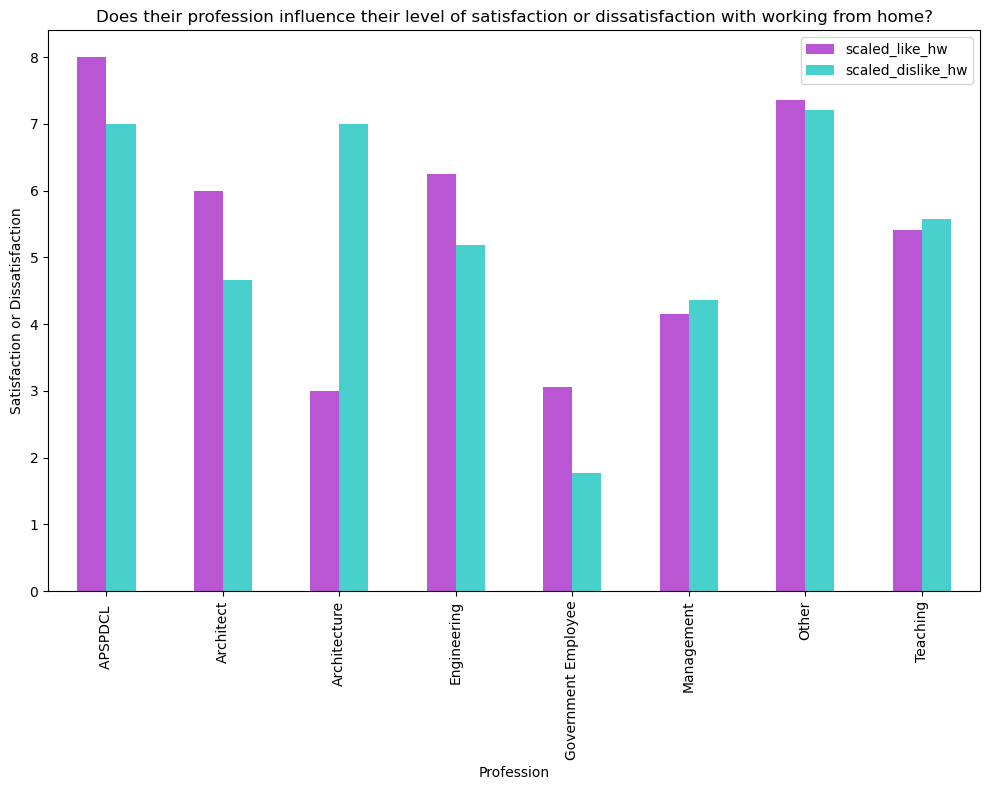

In [15]:
#Plotting a bar chart using matplotlib to visualize whether or not they like working from home depending on line of work
#Note this was on a scale of 1-8
hw_work_data.plot(kind='bar', figsize=(10, 8), color = ['mediumorchid', 'mediumturquoise'])
plt.xlabel('Profession')
plt.ylabel('Satisfaction or Dissatisfaction')
plt.title('Does their profession influence their level of satisfaction or dissatisfaction with working from home?')
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

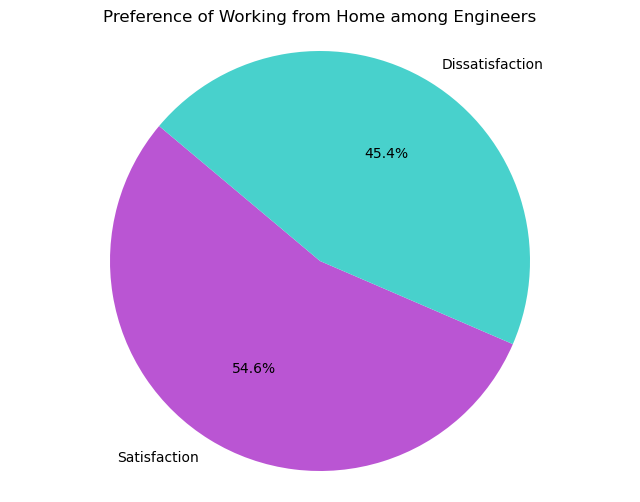

In [16]:
#For a different look, specifically choosing one line of work and seeing the percentage of those workers that like working from home in a pie chart

# Filter the data for engineers
engineers_data = hw_work_data.loc["Engineering"]

# Count the number of engineers who like and dislike working from home
like_count = engineers_data["scaled_like_hw"]
dislike_count = engineers_data["scaled_dislike_hw"]

# Create a pie chart
labels = ['Satisfaction', 'Dissatisfaction']
sizes = [like_count, dislike_count]
colors = ['mediumorchid', 'mediumturquoise']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Preference of Working from Home among Engineers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Interpretation of Data

During the pandemic, professionals of all kinds had to start working from home to keep safe. Some workers in certain environments thrive better in an on-site position while others do better working from their own home. We can see that the line of work that had the most difference of opinion are architecture workers. They heavily dislike working from home. This might be because their work requires more in-person site visits and access to certain tools and resources that might not be available at home. The line of work with the least difference in opinion are "Other", but since we can't interpret what that means, next up are teachers. Teachers are nearly equal in their dislike and like of work from home. This might be due to different teaching styles, the content itself of the course, among many other criteria. I think it's interesting to see how many professions agree and disagree of working from home because it provides valuable insights into the varying dynamics of different industries and the diverse needs and preferences of workers. Understanding these perspectives can inform decisions regarding remote work policies, workplace flexibility, and the future of work arrangements. 

For the pie chart, I wanted to take a closer look at a specific line of work. I chose engineers because they are the type of worker that seems most likely to like working from home but I was suprised to see that it was nearly equal in their like and dislike. This unexpected finding prompts further investigation into the factors influencing engineers' attitudes toward remote work. It raises questions about the perceived benefits and challenges of working from home within the engineering profession, as well as the impact of individual preferences, job roles, and organizational cultures. Exploring these nuances can provide valuable insights into the complexities of remote work adoption and effectiveness within specific occupational groups.

Note: this was just for curiosity's sake but apparently the acronym APSPDCL means Andhra Pradesh Southern Power Distribution Company Limited which is located in India. 

Question 1 Answer: There seems to be no steady relationship between the profession and whether the person is satisifed or dissatisfied working from home. Every profession varied in what they do and every answer was either split down the middle or had almost no similarity. Therefore, there is no influence that can be pointed out with this data. However, it's fascinating to observe how individual preferences and circumstances shape one's satisfaction with remote work, regardless of their profession.